# Descriptive analysis

## Importing libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date

## Loading data

In [10]:
ratings_df = pd.read_csv('Prepared Frames/rating_data.csv')
main_df = pd.read_csv('Prepared Frames/rated.csv')

In [11]:
main_df.columns

Index(['Ticker', 'Company Name', 'IndustryId', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total Noncurrent Liabilities',
       'Total Liabilities', 'Share Capital & Additional Paid-In Capital',
       'Retained Earnings', 'Total Equity', 'Net Income/Starting Line',
       'Depreciation & Amortization', 'Non-Cash Items',
       'Change in Working Capital', 'Net Cash from Operating Activities',
       'Change in Fixed Assets & Intangibles',
       'Net Cash from Acquisitions & Divestitures',
       'Net Cash from Investing Activities', 'Cash from (Repayment of) Debt',
       'Cash from (Repurchase of) Equity',
       'Net Cash from Financing Activities', 'Net Cha

## Distribution of ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

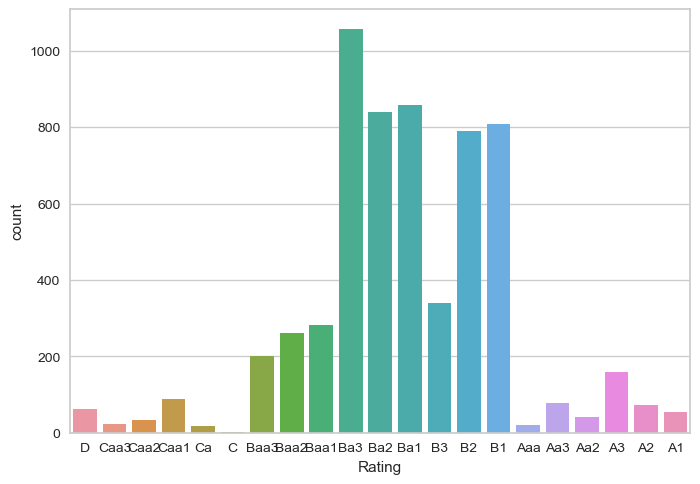

In [12]:
# We can see a big number of companies with B ratings and very few with A or C
sns.countplot(x='Rating', data=main_df.sort_values(by = ['Rating'], ascending = False))